# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings 
warnings.filterwarnings("ignore")

# Reading Dataset

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [3]:
#Making a copy of the dataset to avoid losing when we manupilate the dataset
train_orign = train.copy()
trest_orign = test.copy()

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Exploratory data analysis (EDA)

In [6]:
#Display Columns in train dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

our target varible is Loan_Status, thus the rest are independent varibles

In [7]:
#Display Columns in test dataset
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have same features as train dataset, except Loan_Statust. We are going to build a model to predict loan status using train dataset

In [8]:
#Displaying datatypes for train dataset
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

object: Object format means variables are categorical, categorigal varibles in our train dataset are Loand_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, and Loan_Status.

int64: Represents integer variables in this case we have ApplicationIncome as integer variable.
float64: Represents numerical values that have decimals, in this case wenumerical varibles are; CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

In [9]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


We have 614 rows and 13 columns in train dataset, 36 rows and 12 columns in test dataset

# Univariate Analysis

## 1. Target Varible

Our target variable is Loan_Status, being categorical; we consider frequency table, parcentage distribution, and bar plot

In [10]:
# Frequency table of our variable will give us the count of each category in Loan_Status varible
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [11]:
#Determining percentage distributions for Loan_Status
train['Loan_Status'].value_counts(normalize = True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

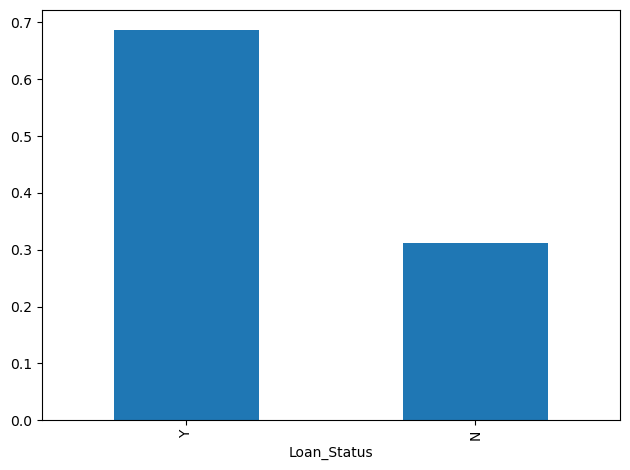

In [12]:
#Bar plot for Loan_Status Variable
train['Loan_Status'].value_counts(normalize = True).plot.bar()
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('loan_Status.png')
plt.show()

422 loans were aproved translating to 69% of the loan applications while 192 loans were rejected represeing 31% of the loan applications. 

## 2. Independent Variables 

In [13]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Object: Categorical data

float65: integer variables with decimal, also called Numerical varibles

int64: integer varibles

In [14]:
# Categorical, and Numerical Variable analysis
categorical_varibales = train.select_dtypes(include = ['object'])
print("Categorical varibles include:")
for i in categorical_varibales:
    print(i)

numerical_varibles = train.select_dtypes(include = ['int64', 'float64'])
print("")
print("Numerical varibles include:")
for j in numerical_varibles:
    print(j)

Categorical varibles include:
Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status

Numerical varibles include:
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History


From our train data, we can group our varibles as:
1. Numerical features:  
ApplicantIncome  
CoapplicantIncome  
LoanAmount  
Loan_Amount_Term

2. Categorical features:  
Credit_History  
Gender  
Married  
Self_Employed  
Loan_Status

3. Ordinal features:  
Dependents  
Education  
Property_Area

#### 1. Categorical Analysis

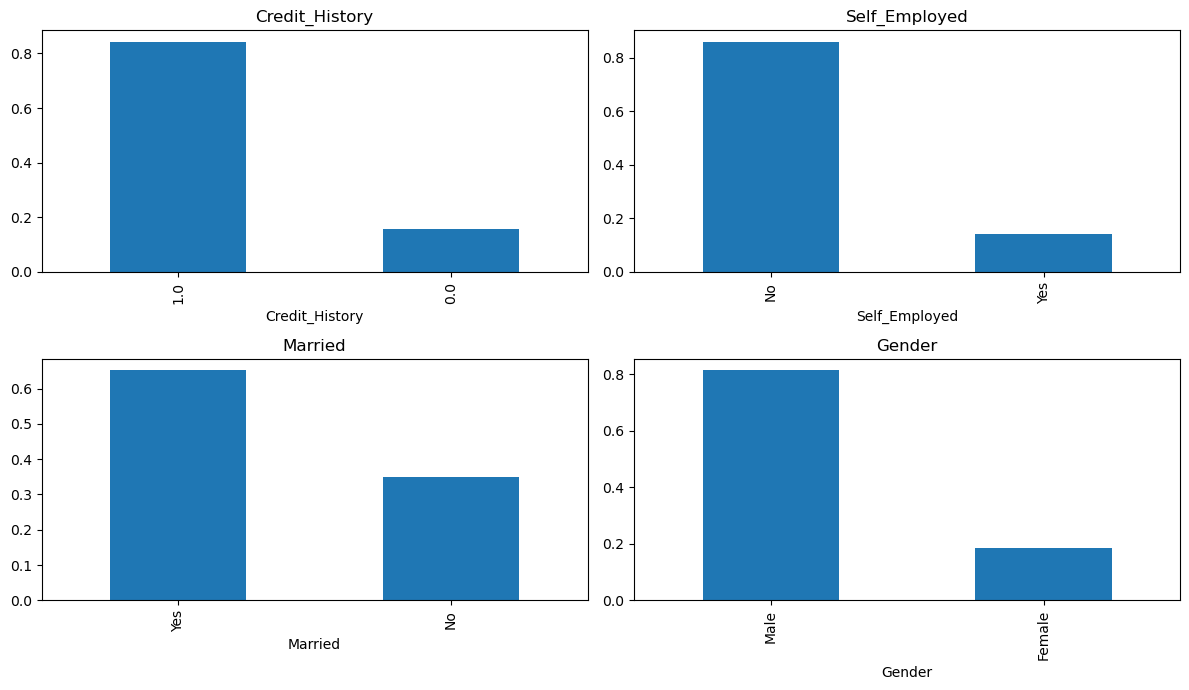

In [15]:
paper, axes = plt.subplots(2, 2, figsize=(12, 7))
train['Credit_History'].value_counts(normalize = True).plot.bar(ax=axes[0,0], title = "Credit_History")
train['Self_Employed'].value_counts(normalize = True).plot.bar(ax=axes[0,1], title = "Self_Employed")
train['Married'].value_counts(normalize = True).plot.bar(ax=axes[1,0], title = "Married")
train['Gender'].value_counts(normalize = True).plot.bar(ax=axes[1,1], title = "Gender")
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('Categorical_analysis.png')

It can be inferred from the above bar plots that:

Around 80% of applicants in the dataset are male.  
Around 65% of the applicants in the dataset are married.  
Around 15% of applicants in the dataset are self-employed.  
Around 85% of applicants have repaid their doubts.  

#### 2. Ordinal features

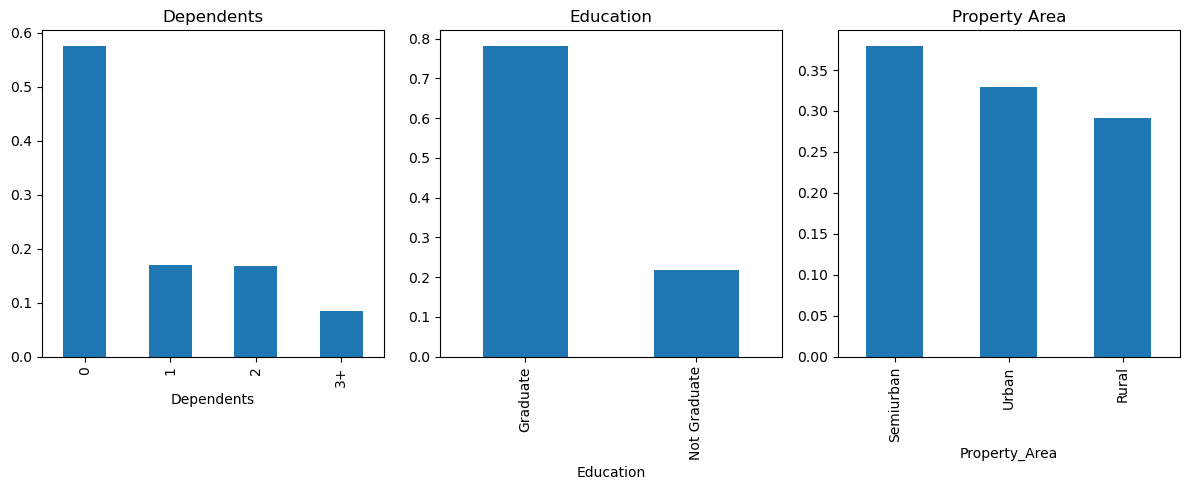

In [16]:
paper, axes = plt.subplots(1,3, figsize = (12, 5))
train['Dependents'].value_counts(normalize = True).plot.bar(ax=axes[0], title = "Dependents")
train['Education'].value_counts(normalize = True).plot.bar(ax=axes[1], title = "Education")
train['Property_Area'].value_counts(normalize = True).plot.bar(ax=axes[2], title = "Property Area")
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('Ordinal_features.png')

The bar plots reveal the following insights:

The majority of applicants have no dependents.  
Approximately 80% of applicants are graduates.  
Most applicants reside in Semiurban areas.  

#### 3. Numerical Analysis
#### a. distribution of Applicant Income

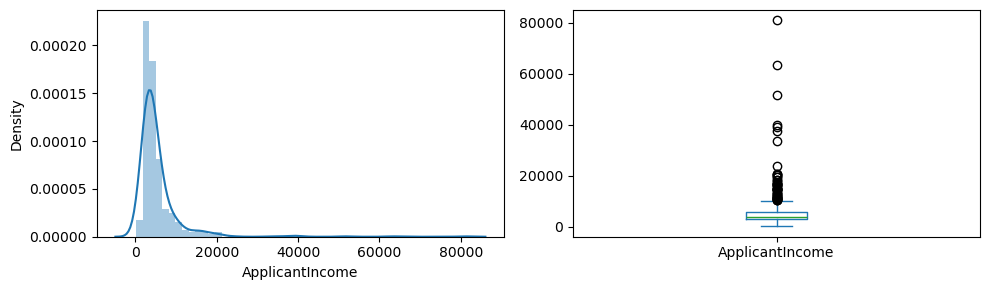

In [17]:
paper, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.distplot(train['ApplicantIncome'], ax=axes[0])
train['ApplicantIncome'].plot.box(ax=axes[1])
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('Application_Income.png')

We can infer that the majority of the applicant income data is skewed to the left, indicating a non-normal distribution. In later sections, we will attempt to normalize this data, as algorithms perform better with normally distributed data.

The box plot reveals a significant number of outliers or extreme values, likely due to societal income disparity.

Additionally, this skew may be influenced by varying education levels among the applicants. To address this, we will analyze the data by separating applicants based on their education levels.

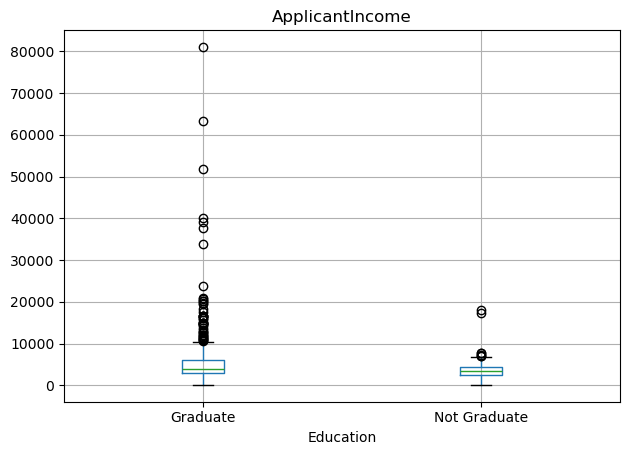

In [18]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('Application_income_education.png')
plt.show()

We observe that a higher number of graduates have exceptionally high incomes, which appear as outliers.

#### b. CoapplicantIncome

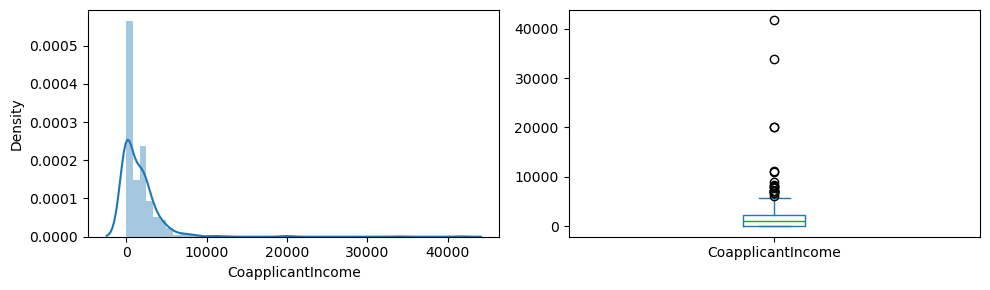

In [19]:
paper, axes = plt.subplots(1,2, figsize = (10,3))
sns.distplot(train['CoapplicantIncome'], ax = axes[0])
train['CoapplicantIncome'].plot.box(ax=axes[1])
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('Coapplication_income.png')

We observe a similar distribution for co-applicants' income as we do for applicants' income. The majority of co-applicants' incomes range from 0 to 5000. Additionally, there are many outliers in the applicants' income, indicating it is not normally distributed.

#### c. LoanAmount

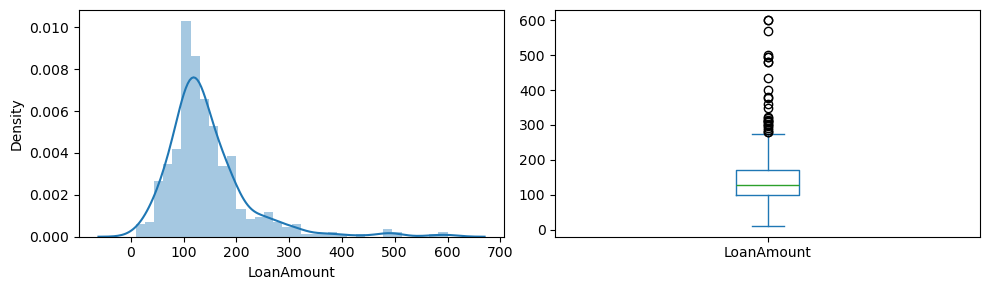

In [20]:
paper, axes = plt.subplots(1,2, figsize = (10,3))
LoanTrain = train.dropna()
sns.distplot(LoanTrain['LoanAmount'], ax = axes[0])
LoanTrain['LoanAmount'].plot.box(ax = axes[1])
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('Loan_income.png')

# Bivariate Analysis

Loan application hypotheses:

- Applicants with higher incomes are more likely to have their loans approved.  
- Applicants who have repaid previous debts should have better chances of loan approval.  
- Loan approval is likely influenced by the loan amount; smaller loans should have higher approval rates.  
- The lower the monthly repayment amount, the higher the chances of loan approval.  

## Categorical Independent Variable vs Target Variable

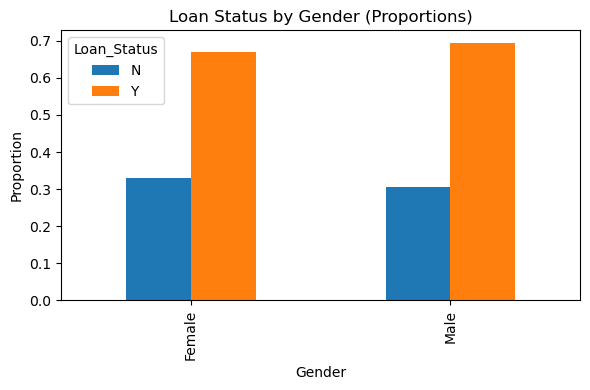

In [21]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
# Gender.plot(kind="bar", figsize=(6,4))
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.title('Loan Status by Gender')
# plt.show()


# Normalize by row
Gender_normalized = Gender.div(Gender.sum(1).astype(float), axis=0)
Gender_normalized.plot(kind="bar", figsize=(6,4))
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Loan Status by Gender (Proportions)')
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('loan_status_by_gender.png')
plt.show()

We can infer that the proportion of male and female applicants is more or less the same for both approved and unapproved loans

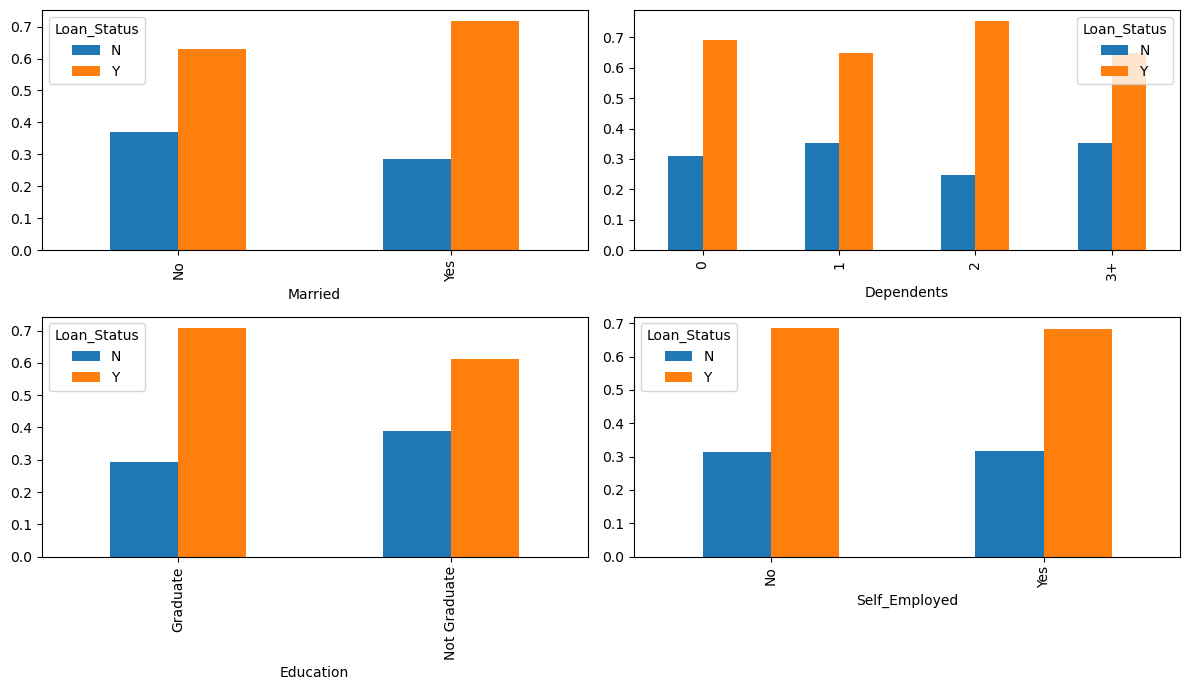

In [22]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

# Normalize by row
Married_normalized = Married.div(Married.sum(1).astype(float), axis=0)
Dependentsr_normalized = Dependents.div(Dependents.sum(1).astype(float), axis=0)
Education_normalized = Education.div(Education.sum(1).astype(float), axis=0)
Self_Employed_normalized = Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0)

#Plots
paper, axes = plt.subplots(2, 2, figsize=(12, 7))
Married_normalized.plot(kind="bar", ax= axes[0,0])
Dependentsr_normalized.plot(kind="bar", ax= axes[0,1])
Education_normalized.plot(kind="bar", ax= axes[1,0])
Self_Employed_normalized.plot(kind="bar", ax= axes[1,1])

plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('loan_status_independent_variables.png')

Here are the key points we can infer from these graphs:

Approved loans have a higher proportion of married applicants.  
Load approval for graduate applicants is of higher proportion.  
The distribution of applicants with 1 or 3+ dependents is similar regardless of the loan status.  
The Self_Employed vs Loan_Status plot does not provide any significant insights.  

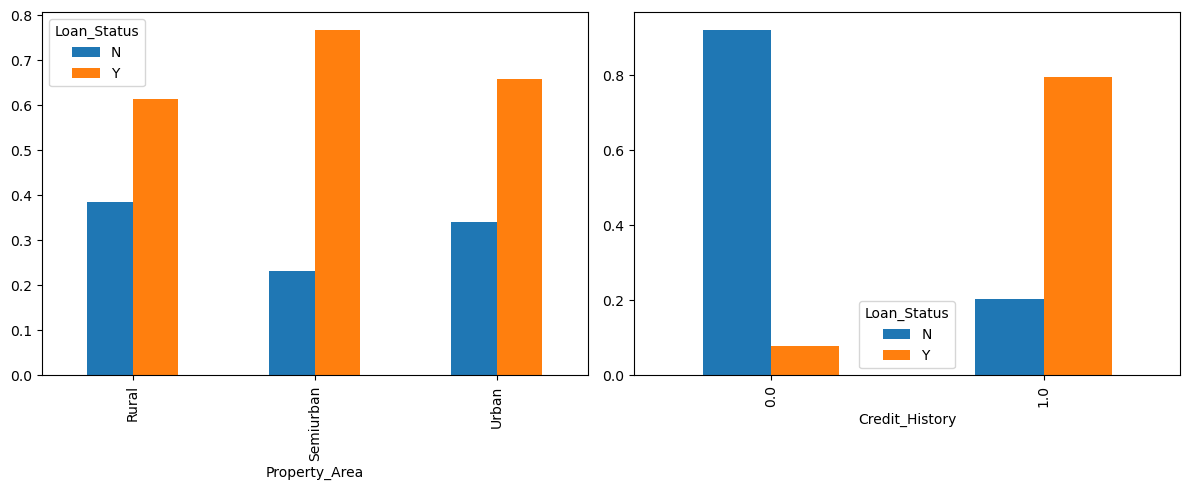

In [23]:
#crosstabulation table where the rows represent different categories of 'Credit_History' and the columns represent different categories of 'Loan_Status'.
#The cells in the table contain the frequency counts of occurrences for each combination of 'Credit_History' and 'Loan_Status'.
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])

#normalization of  the Property_Area and Credit_History crosstabulation tables. 
Property_Area_normalized = Property_Area.div(Property_Area.sum(1).astype(float), axis = 0)
Credit_History_normalized = Credit_History.div(Credit_History.sum(1).astype(float), axis = 0)

#plot
paper, axes = plt.subplots(1,2, figsize=(12, 5))
Property_Area_normalized.plot(kind = 'bar', ax = axes[0])
Credit_History_normalized.plot(kind = 'bar', ax = axes[1])
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('property_area_and_Credit_History.png')

Credit History and Loan Approval:  
People with a credit history of 1 (indicating good credit history) are more likely to get their loans approved. 
This is evident from the higher proportion of loan approvals for applicants with a credit history of 1 compared to those with a credit history of 0.  
                                                            
Property Area and Loan Approval:  
The proportion of loans getting approved in semi-urban areas is higher compared to that in rural or urban areas. 
This indicates that applicants from semi-urban areas have a better chance of getting their loans approved.

# Numerical Independent Variable vs Target Variable
We will compare the mean income of people with approved loans to the mean income of people with rejected loans.

#### a.Mean analysis for  Loan status Vs Applicant Income

In [24]:
train.groupby("Loan_Status")["ApplicantIncome"].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

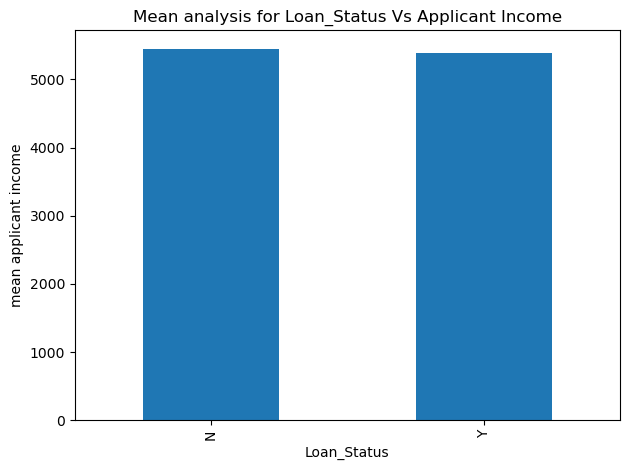

In [25]:
#Plot
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()
plt.ylabel("mean applicant income")
plt.title("Mean analysis for Loan_Status Vs Applicant Income")
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('loan_status_vs_Mean_Applicant_income.png')
plt.show()

Here, the y-axis represents the mean applicant income. We don't observe any significant difference in the mean income between approved and rejected loans.To gain more insights, let's categorize the applicant income into bins and analyze the loan status for each bin.

#### b. Loan status Vs Applicant Income

In [26]:
max_ApplicantIncome = train["ApplicantIncome"].max()
min_ApplicantIncome = train["ApplicantIncome"].min()
print(f"Maximun Applicant's income is {max_ApplicantIncome}")
print(f"Minimun Applicant's income is {min_ApplicantIncome}")

Maximun Applicant's income is 81000
Minimun Applicant's income is 150


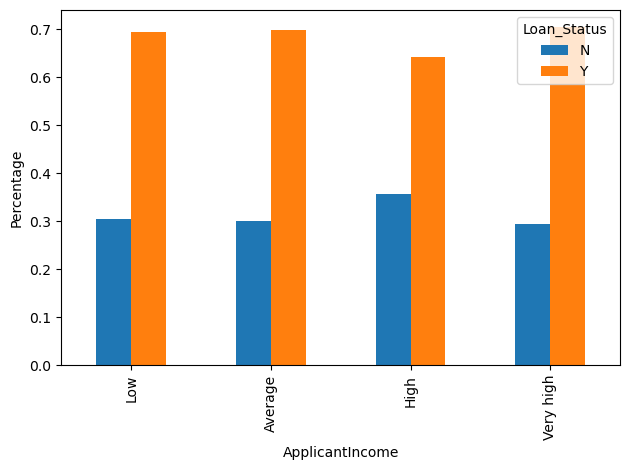

In [27]:
# Define bins and labels
bins=[0,3000,4500,6500,81000]
bins_category=['Low','Average','High','Very high']
train["bins_Income"] = pd.cut(train['ApplicantIncome'], bins, labels=bins_category)

# Create a crosstab and normalize it
bins_Income = pd.crosstab(train["bins_Income"], train["Loan_Status"])
Income = bins_Income.div(bins_Income.sum(1).astype(float), axis = 0)

# Plotting the normalized crosstab
Income.plot(kind = 'bar')
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('loan_status_by_Applicant_income.png')
plt.show()

It can be inferred that the applicant's income does not significantly affect the chances of loan approval. This contradicts our initial hypothesis that higher applicant income would lead to higher chances of loan approval.

#### c. Loan Status Vs Coapplicant Income

In [28]:
# Analysis of the coapplicant income and loan amount variables
max_CoapplicantIncome = train["CoapplicantIncome"].max()
min_CoapplicantIncome = train["CoapplicantIncome"].min()
print(f"Maximun Coapplicant's income is {max_CoapplicantIncome}")
print(f"Minimun Coapplicant's income is {min_CoapplicantIncome}")

Maximun Coapplicant's income is 41667.0
Minimun Coapplicant's income is 0.0


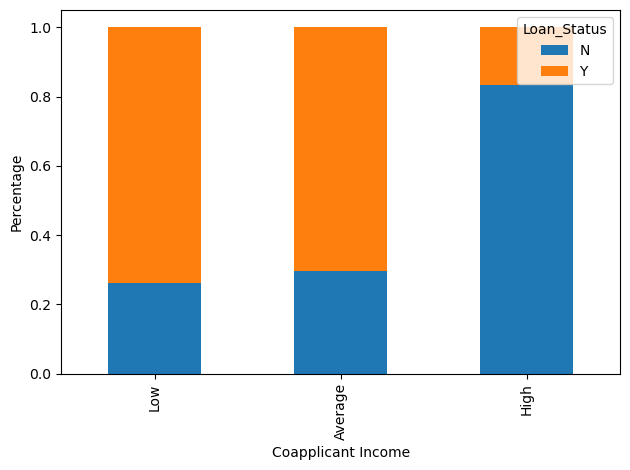

In [29]:
# Define bins and labels
bins = [0, 3000, 10000,42000]
bins_CoapplicantIncome=['Low','Average','High']
train['bins_CoapplicantIncome'] = pd.cut(train["CoapplicantIncome"], bins, labels =bins_CoapplicantIncome)

# Create a crosstab and normalize it
bins_CoapplicantIncome = pd.crosstab(train["bins_CoapplicantIncome"], train["Loan_Status"])
CoapplicantIncome_Plot = bins_CoapplicantIncome.div(bins_CoapplicantIncome.sum(1).astype(float), axis = 0)

# Plotting the normalized crosstab
CoapplicantIncome_Plot.plot(kind = 'bar', stacked = True)
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('loan_status_by_total_income.png')
plt.xlabel("Coapplicant Income")
plt.ylabel("Percentage")
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('loan_status_by_Coapplicant_Income.png')
plt.show()

The graph above indicates that even if the co-applicant's income is lower, the chances of loan approval remain high. However, this observation appears inaccurate.

A likely reason is that many applicants do not have a co-applicant, resulting in a co-applicant income of zero for these cases. Consequently, loan approval does not rely on the co-applicant's income.

To address this, we can create a new variable that combines both the applicant's and the co-applicant's incomes. This will allow us to visualize the combined effect of income on loan approval more accurately.

To analyze the combined effect of the applicant's and co-applicant's incomes on loan approval, we need to follow these steps:

Create a new variable that sums the applicant's income and the co-applicant's income.  
Visualize the relationship between this combined income and the loan status.  

#### c. Loan Status Vs Total Income

In [30]:
#Create a new variable (Total_Income) that sums the applicant's income and the co-applicant's incom
train["Total_Income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]

#Determin maximum and minimum Total income
max_Total_Income = train["Total_Income"].max()
Min_Total_Income = train["Total_Income"].min()
print(f'maximum total income is {max_Total_Income}')
print(f'maximum total income is {Min_Total_Income}')

maximum total income is 81000.0
maximum total income is 1442.0


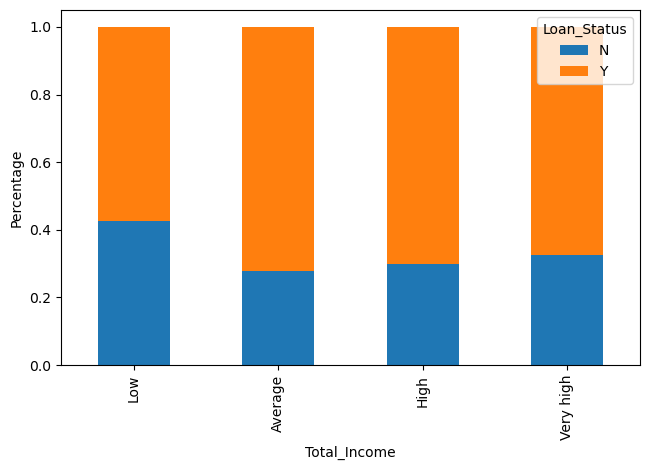

In [31]:
# Plotting the effect of Total Income on Loan Status
# Define bins and labels
bins=[0,3000,4500,6500,81000]
bins_Total_Income = ['Low','Average','High','Very high']
train["bins_Total_Income"] = pd.cut(train["Total_Income"], bins, labels =bins_Total_Income )

# Create a crosstab and normalize it
bins_Total_Income = pd.crosstab(train["bins_Total_Income"], train["Loan_Status"])
Total_Income_Plot = bins_Total_Income.div(bins_Total_Income.sum(1).astype(float), axis = 0)

# Plotting the normalized crosstab
Total_Income_Plot.plot(kind = "bar", stacked = True)
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.savefig('loan_status_by_total_income.png')
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

The bar plot illustrates the proportion of loans approved across different total income categories: Low, Average, High, and Very High.

Key Observation:  
Low Income: The proportion of loans approved for applicants in the low total income category is significantly lower.  
Average, High, and Very High Income: Applicants with average, high, and very high total incomes have a higher proportion of loan approvals. 

This suggests that higher income levels positively impact the likelihood of loan approval. Lenders may perceive applicants with higher incomes as lower risk, thus leading to higher approval rates.

 #### d. Loan Status Vs Loan Amount

In [32]:
max_LoanAmount = train["LoanAmount"].max()
min_LoanAmount = train["LoanAmount"].min()
print(f'Maximum loan amount is {max_LoanAmount}')
print(f'Minimum loan amount is {min_LoanAmount}')

Maximum loan amount is 700.0
Minimum loan amount is 9.0


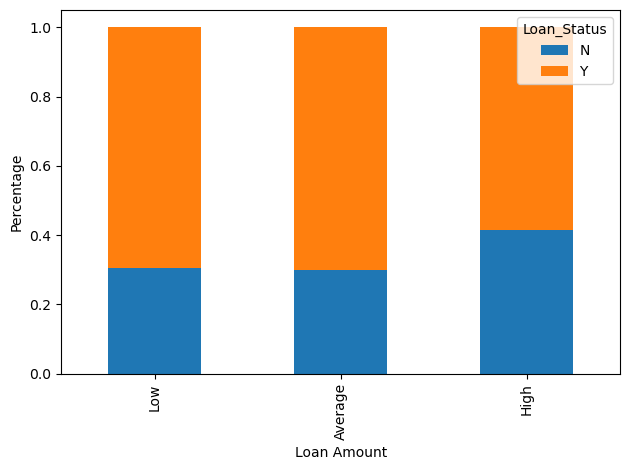

In [33]:
bins = [0, 100, 300, 700]
bins_Loan_Amount = ['Low','Average','High']

train["bins_Loan_Amount"] = pd.cut(train["LoanAmount"], bins, labels = bins_Loan_Amount)
bins_Loan_Amount = pd.crosstab(train["bins_Loan_Amount"], train["Loan_Status"])
LoanAmount_plot = bins_Loan_Amount.div(bins_Loan_Amount.sum(1).astype(float), axis = 0)

LoanAmount_plot.plot(kind = 'bar', stacked = True)
plt.xlabel("Loan Amount")
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('loan_status_by_loan_Amount.png')
plt.show()

Based on the bar plot:  
Low and Average Loan Amount: The proportion of approved loans is higher for applicants with low and average loan amounts.  
High and Very High Loan Amount: The proportion of approved loans decreases as the loan amount increases.  

This supports the hypothesis that lower loan amounts have higher approval rates. Lenders are more likely to approve smaller loans due to the reduced financial risk.

By clearly showing the proportion of loan approvals across different loan amount categories, we can better understand the dynamics between loan amounts and approval rates.

#### e. HeatMap

Let's streamline our data preprocessing steps for better compatibility with numerical models like logistic regression. We'll drop the bins created for exploration, convert '3+' in the 'Dependents' variable to 3, and encode the target variable into binary form (0 and 1).

In [34]:
# Dropping unnecessary columns
train = train.drop(['bins_Income', 'bins_CoapplicantIncome', 'Total_Income', 'bins_Total_Income', 'bins_Loan_Amount'], axis=1)

# Converting '3+' in 'Dependents' to 3
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

# Encoding 'Loan_Status' into binary form
train['Loan_Status'].replace({'N': 0, 'Y': 1}, inplace=True)

# Displaying the modified train dataframe
train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


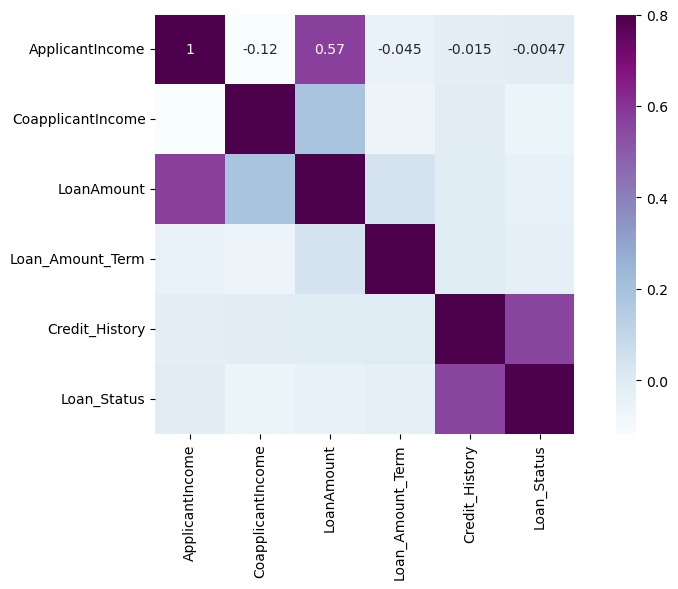

In [43]:
# Selecting only numeric columns
numeric_columns = train.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
matrix = numeric_columns.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu", annot=True)

# Show the plot
plt.tight_layout()
plt.savefig('Heat_Map.png')
plt.show()

Heatmaps provide visual representations of data using color variations. Darker colors indicate stronger correlations between variables. In our correlation matrix:

Strong Correlations:  
ApplicantIncome and LoanAmount: These variables exhibit a notable positive correlation, suggesting that higher applicant incomes are associated with larger loan amounts.  
Credit_History and Loan_Status: There's a significant correlation between credit history and loan approval status. A positive credit history tends to increase the likelihood of loan approval.  

Additional Correlation:  
LoanAmount and CoapplicantIncome: There's a moderate correlation between loan amount and coapplicant income. This implies that as the coapplicant's income increases, the loan amount tends to increase as well.  

These insights highlight key relationships within the dataset and can inform further analysis or model development.